In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_sports_attendance_figures'
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

html_content = requests.get(url).content
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('tbody')
tr = soup.find_all('tr')

all_data = []
for i in range(1,len(tr)):
    sport = []
    td = tr[i].find_all('td')
    for data in td:
        sport.append(data.text)
    all_data.append(sport)
    
clean_data = list(map(lambda x: x[0:8], all_data))
column_name = ['League', 
               'Sport', 
               'Country', 
               'Seasons', 
               'Teams', 
               'Games', 
               'Total Attendance', 
               'Average Attendance']

df = pd.DataFrame(clean_data, columns = column_name)

In [10]:
df.head()

,League,Sport,Country,Seasons,Teams,Games,Total Attendance,Average Attendance
0,National Football League\n,American football\n,United States\n,2017\n,32\n,256\n,"17,788,671\n","67,405\n"
1,Indian Premier League,Cricket,India,2019,10,60,"3,422,347","58,006"
2,Bundesliga,Association football (soccer),Germany,2018–19,18,306,"13,295,405","43,449"
3,Premier League,Association football (soccer),England and Wales,2018–19,20,380,"14,503,954","38,168"
4,Australian Football League,Australian football,Australia,2018,18,207,"7,594,302","36,687"


In [11]:
df.tail()

,League,Sport,Country,Seasons,Teams,Games,Total Attendance,Average Attendance
331,FIBA Intercontinental Cup\n,Basketball\n,Worldwide\n,2015\n,Ginásio do Ibirapuera\n,"São Paulo, Brazil\n","5,500\n","13,500\n"
332,"8,000\n",None,None,None,None,None,None,None
333,None,None,None,None,None,None,None,None
334,\nLeagues\n,None,None,None,None,None,None,None
335,\nAmerican football\nAssociation football\nAus...,None,None,None,None,None,None,None


In [12]:
df.isna()

,League,Sport,Country,Seasons,Teams,Games,Total Attendance,Average Attendance
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
331,False,False,False,False,False,False,False,False
332,False,True,True,True,True,True,True,True
333,True,True,True,True,True,True,True,True
334,False,True,True,True,True,True,True,True


In [13]:
df.isna().sum()

League                11
Sport                 14
Country               16
Seasons               17
Teams                 19
Games                 42
Total Attendance      42
Average Attendance    51
dtype: int64

Text(0.5, 1.0, 'List of sports attendance figures')

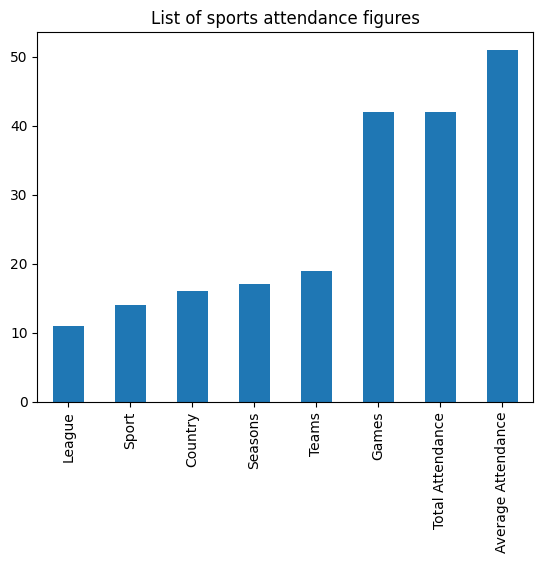

In [14]:
df.isna().sum().plot.bar()
plt.title("List of sports attendance figures")

Text(0.5, 1.0, 'List of sports attendance figures')

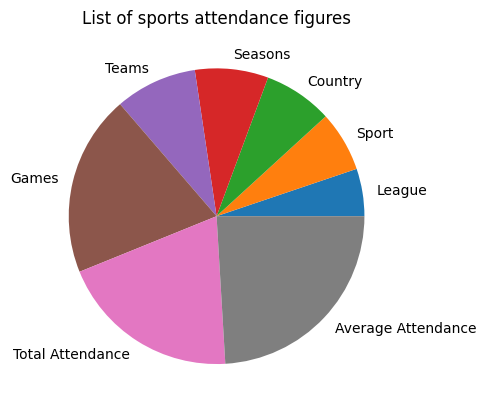

In [18]:
df.isna().sum().plot.pie()
plt.title("List of sports attendance figures")

Text(0.5, 1.0, 'List of sports attendance figures')

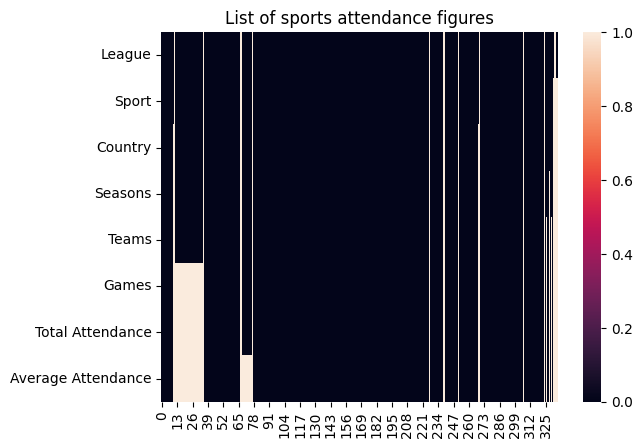

In [20]:
sns.heatmap(df.isna().transpose())
plt.title("List of sports attendance figures")

Text(0.5, 1.0, 'Teams')

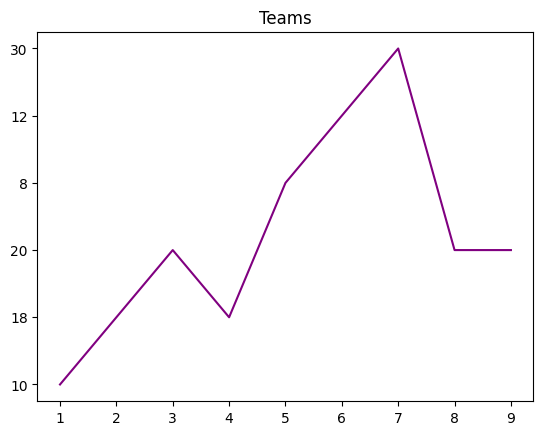

In [36]:
plt.plot(df['Teams'][1:10], color = 'purple')
plt.title('Teams')

Text(0.5, 1.0, 'Teams')

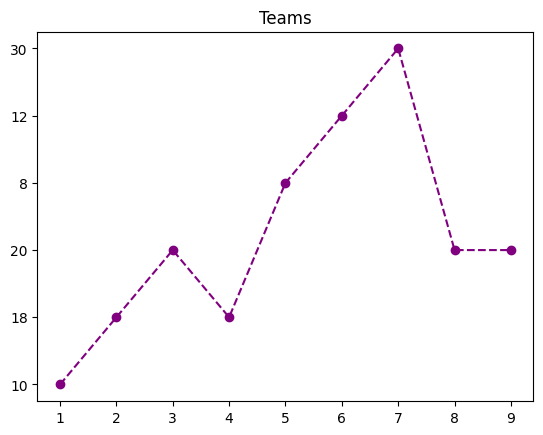

In [38]:
plt.plot(df['Teams'][1:10], 'o--', color = 'purple')
plt.title('Teams')

In [24]:
df.to_csv('Attendance.csv', index = False)